## Comparing Disentanglement Scores for Kang - Beta Vae 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import scanpy as sc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import glob, os
import matplotlib
import re

In [2]:
folders = os.listdir()
folders.sort(reverse=True)
print(folders)

['latent5_alpha50', 'latent5_alpha5', 'latent5_alpha20', 'latent5_alpha100', 'latent5_alpha1', 'Vae_loss_all_5.png', 'Recon_loss_all_5.png', 'Max_DS_feature_5.png', 'KL_loss_all_5.png', 'Dentate_Graphs_losses.ipynb', 'Dentate_Graphs_dis-score.ipynb', 'Avg_DS_feature_5.png', '.ipynb_checkpoints']


In [3]:

z_dims = []
alphas = []
age_max = []
cluster_max = []
gene_max = []
seq_max = []
age_avg = []
cluster_avg = []
gene_avg = []
seq_avg = []
max_vals = []
avg_vals = []
avg_dims = []
max_dims = []


for folder_name in folders:
    try:
        df = pd.read_csv(folder_name+"/4_observationkeras_linear_classifier_output_local.csv",index_col=0)
        z = re.search('latent(\d+)', folder_name)
        #df.fillna(0,inplace=True)
        #print(df)
        if int(z[1]) == 10:
            continue
        al = re.search('alpha(\d+)', folder_name)
        z_dims.append(int(z[1]))
        alphas.append(int(al[1]))
        max_vals.append(list(df.max()))
        avg_vals.append(list(df.mean()))
        avg_dims.append(list(df.mean(axis=1)))
        max_dims.append(list(df.max(axis=1)))
    except:
        pass

In [4]:
print(alphas)

[50, 5, 20, 100, 1]


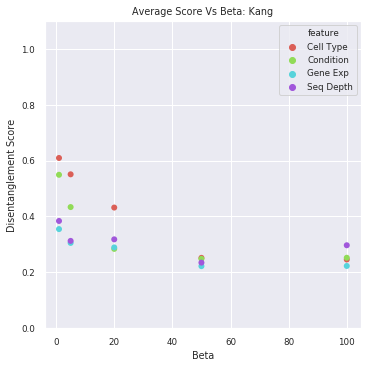

In [5]:
avg_df = pd.DataFrame(avg_vals,columns=["Cell Type","Condition","Gene Exp","Seq Depth"])
avg_df["alphas"]=alphas
df1 =avg_df.melt(id_vars=['alphas'], 
              value_vars=["Cell Type","Condition","Gene Exp","Seq Depth"],
              var_name='feature', value_name='score')

sns.set(font_scale=0.8)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(5,5),constrained_layout=True)
scatter1 = sns.scatterplot('alphas','score',legend='full',hue='feature',data=df1,
                          linewidth=0,palette=sns.color_palette('hls', n_colors=4))
scatter1.set_ylim([0, 1.1])
scatter1.set_xlabel("Beta")
scatter1.set_ylabel("Disentanglement Score")
scatter1.set_title("Average Score Vs Beta: Kang")
#scatter2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("New_Seurat_beta_ds_avg.png",bbox_inches="tight",dpi=150)

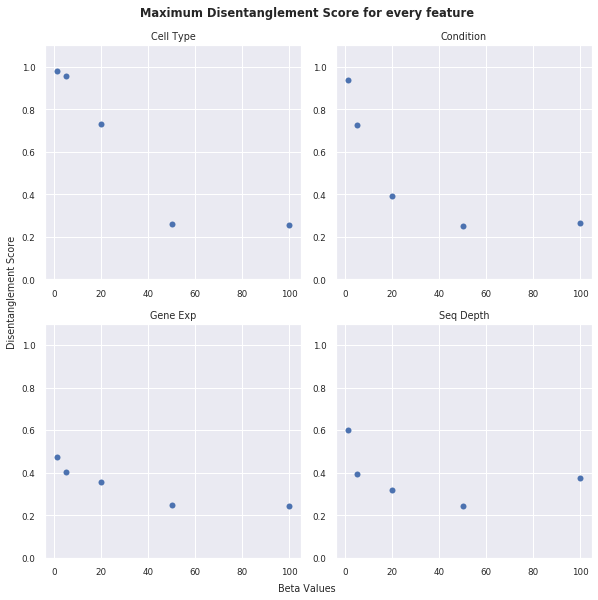

In [6]:
sns.set(font_scale=0.8)
sns.set_style("darkgrid")
fig, ax = plt.subplots(2,2,figsize=(8,8),constrained_layout=True)
scatter1 = sns.scatterplot(alphas,[pt[0] for pt in max_vals],linewidth=0,ax=ax[0,0])
scatter2 = sns.scatterplot(alphas,[pt[1] for pt in max_vals],linewidth=0,ax=ax[0,1])
scatter3 = sns.scatterplot(alphas,[pt[2] for pt in max_vals],linewidth=0,ax=ax[1,0])
scatter4 = sns.scatterplot(alphas,[pt[3] for pt in max_vals],linewidth=0,ax=ax[1,1])

scatter1.set_title("Cell Type")
scatter2.set_title("Condition")
scatter3.set_title("Gene Exp")
scatter4.set_title("Seq Depth")
plt.suptitle("Maximum Disentanglement Score for every feature",weight="bold")

scatter1.set_ylim([0, 1.1])
scatter2.set_ylim([0, 1.1])
scatter3.set_ylim([0, 1.1])
scatter4.set_ylim([0, 1.1])

fig.text(0.5, -0.02, 'Beta Values', ha='center')
fig.text(-0.02, 0.5, 'Disentanglement Score', va='center', rotation='vertical')
plt.savefig("Max_DS_feature_5.png",bbox_inches="tight")

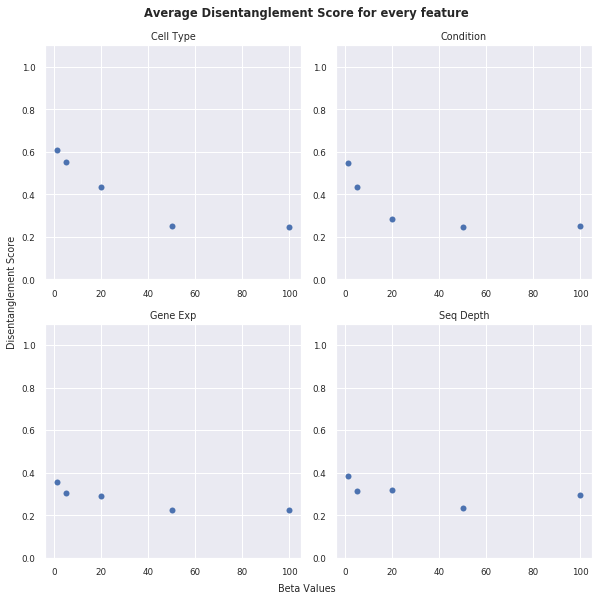

In [7]:
sns.set(font_scale=0.8)
sns.set_style("darkgrid")
fig, ax = plt.subplots(2,2,figsize=(8,8),constrained_layout=True)
scatter1 = sns.scatterplot(alphas,[pt[0] for pt in avg_vals],linewidth=0,ax=ax[0,0])
scatter2 = sns.scatterplot(alphas,[pt[1] for pt in avg_vals],linewidth=0,ax=ax[0,1])
scatter3 = sns.scatterplot(alphas,[pt[2] for pt in avg_vals],linewidth=0,ax=ax[1,0])
scatter4 = sns.scatterplot(alphas,[pt[3] for pt in avg_vals],linewidth=0,ax=ax[1,1])

scatter1.set_title("Cell Type")
scatter2.set_title("Condition")
scatter3.set_title("Gene Exp")
scatter4.set_title("Seq Depth")
plt.suptitle("Average Disentanglement Score for every feature",weight="bold")

scatter1.set_ylim([0, 1.1])
scatter2.set_ylim([0, 1.1])
scatter3.set_ylim([0, 1.1])
scatter4.set_ylim([0, 1.1])

fig.text(0.5, -0.02, 'Beta Values', ha='center')
fig.text(-0.02, 0.5, 'Disentanglement Score', va='center', rotation='vertical')
plt.savefig("Avg_DS_feature_5.png",bbox_inches="tight")